# Customer Segmentation Using K-Means Clustering
### Implementasi Latihan  Machine Learning 

Project ini bertujuan melakukan segmentasi pelanggan menggunakan algoritma **K-Means Clustering**.  
Dataset berisi 6 fitur utama perilaku pelanggan:

- Age  
- Income  
- App Time  
- Web Time  
- Purchase Count  
- Spending Score  

Tahapan analisis:
1. Exploratory data analysis  
2. Preprocessing data  
3. Penentuan jumlah cluster optimal  
4. Penerapan K-Means  
5. Visualisasi PCA  
6. Profiling tiap cluster  
7. Insight bisnis  



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


## 📥 Load Dataset
Dataset yang digunakan merupakan data simulasi pelanggan e-commerce berdasarkan instruksi matakuliah sebagai latihan project

In [26]:
df = pd.read_csv("../dataset/ecommerce_customers.csv")
df.head()


,Age,Income,App Time,Web Time,Purchase Count,Spending Score
0,56,8971,109.33,82.25,29,82
1,46,7625,163.20,69.93,22,86
2,32,4950,17.73,146.80,4,40
3,25,9992,57.76,61.17,20,84
4,38,14323,171.57,94.99,32,77


## 📊 Exploratory Data Analysis
Melihat informasi data & statistik awal.


In [32]:

print(df.info())
print(df.describe())
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             350 non-null    int64  
 1   Income          350 non-null    int64  
 2   App Time        350 non-null    float64
 3   Web Time        350 non-null    float64
 4   Purchase Count  350 non-null    int64  
 5   Spending Score  350 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 16.5 KB
None
              Age        Income    App Time    Web Time  Purchase Count  \
count  350.000000    350.000000  350.000000  350.000000      350.000000   
mean    39.488571   8606.737143   94.541429   82.996886       19.954286   
std     12.352216   3632.130895   48.799501   45.821039       11.149578   
min     18.000000   2004.000000   10.790000    5.990000        1.000000   
25%     29.000000   5645.000000   51.367500   41.135000       11.000000   
50%     41.000000   8615.50000

## 🧹 Preprocessing Data
Melakukan scaling pada 6 fitur utama agar memiliki skala yang sama.


In [34]:
features = ["Age", "Income", "App Time", "Web Time", "Purchase Count", "Spending Score"]
data = df[features]
data.head()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print("Data berhasil di-scaling!")

Data berhasil di-scaling!


## 📉 Menentukan Jumlah Cluster Optimal — Elbow Method


k=2, inertia=1810.643182712074
k=3, inertia=1628.2444419124577
k=4, inertia=1480.0045544124835
k=5, inertia=1349.1032424224213
k=6, inertia=1251.659885445529
k=7, inertia=1216.6328595786144
k=8, inertia=1116.6469817578204
k=9, inertia=1049.0251186437388
k=10, inertia=997.6423580683065


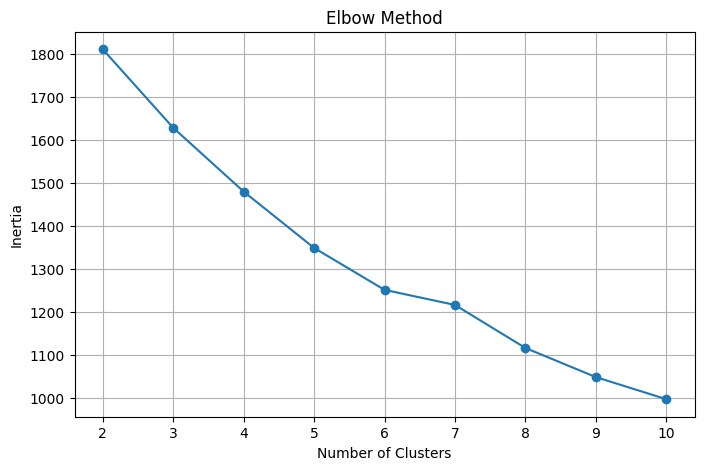

In [35]:
K = range(2, 11)
inertia_values = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)
    print(f"k={k}, inertia={kmeans.inertia_}")

plt.figure(figsize=(8, 5))
plt.plot(list(K), inertia_values, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

## 🧩 Silhouette Score
Mengukur kualitas cluster untuk setiap nilai k.


k=2, Silhouette Score=0.13235072728394662
k=3, Silhouette Score=0.12390435354159779
k=4, Silhouette Score=0.13010919582997799
k=5, Silhouette Score=0.13522980795429373
k=6, Silhouette Score=0.14553685250356413
k=7, Silhouette Score=0.13315039149793234
k=8, Silhouette Score=0.14561893125680792
k=9, Silhouette Score=0.1558397508683933
k=10, Silhouette Score=0.16104043899838633


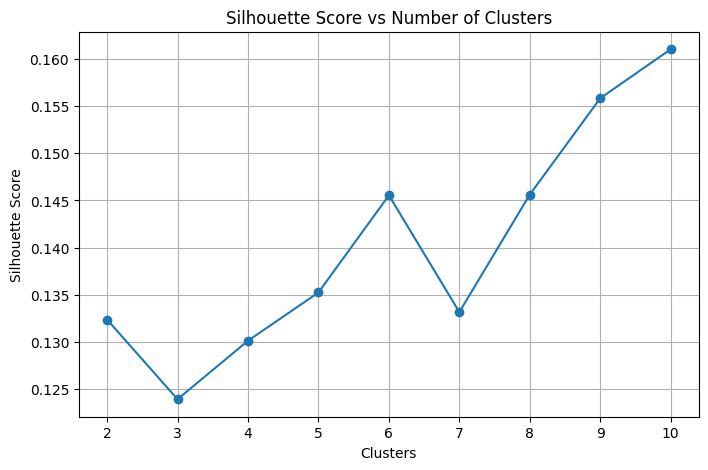

In [36]:
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score={score}")

plt.figure(figsize=(8, 5))
plt.plot(list(K), silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [37]:

best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"🎯 Cluster terbaik adalah: k = {best_k}")


🎯 Cluster terbaik adalah: k = 10


## 🚀 Model Training
Menggunakan jumlah cluster optimal dari hasil analisis (misal k=4).


In [38]:
# K-Means Training
kmeans = KMeans(n_clusters=best_k, random_state=42)
final_labels = kmeans.fit_predict(scaled_data)

df["Cluster"] = final_labels
df.head()


,Age,Income,App Time,Web Time,Purchase Count,Spending Score,Cluster
0,56,8971,109.33,82.25,29,82,7
1,46,7625,163.20,69.93,22,86,7
2,32,4950,17.73,146.80,4,40,9
3,25,9992,57.76,61.17,20,84,6
4,38,14323,171.57,94.99,32,77,7


## 🎨 Visualisasi Cluster (PCA 2D)
Mengurangi dimensi data menjadi 2 komponen untuk visualisasi.


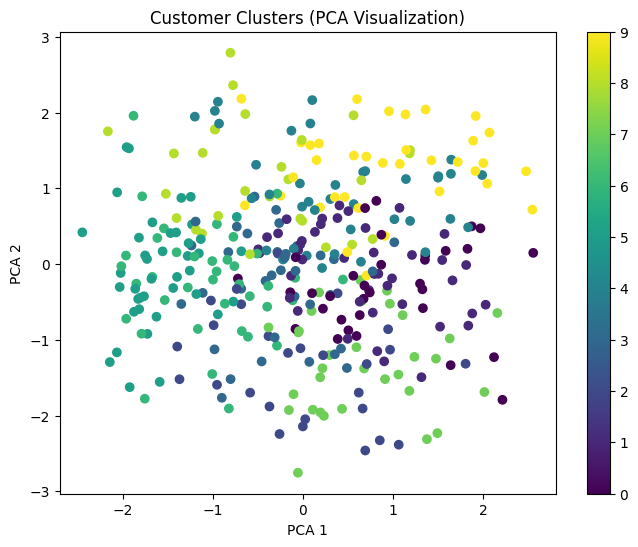

In [39]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(df["PCA1"], df["PCA2"], c=df["Cluster"], cmap="viridis")
plt.title("Customer Clusters (PCA Visualization)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar()
plt.show()

## 📌 Cluster Profiling
Melihat karakteristik tiap cluster berdasarkan nilai rata-rata fitur.


In [40]:
cluster_profile = df.groupby("Cluster")[features].mean()
cluster_profile


,Age,Income,App Time,Web Time,Purchase Count,Spending Score
Cluster,,,,,,
0,49.060606,10765.121212,139.066667,40.326364,13.575758,32.848485
1,47.558140,6178.023256,88.004651,103.188837,30.465116,34.441860
2,24.185185,5738.222222,113.270000,47.311852,30.074074,33.074074
3,49.714286,8833.200000,47.193429,47.595429,19.771429,69.914286
4,46.973684,8729.421053,108.439474,118.029211,11.763158,79.736842
5,30.219512,11867.536585,44.742195,99.899756,27.926829,53.536585
6,25.921053,9660.815789,78.108684,50.915789,12.263158,71.710526
7,42.968750,7836.156250,142.695937,55.232188,30.468750,77.906250
8,33.035714,12248.464286,103.849643,127.283929,11.892857,26.000000


Insight Bisnis

## 💡 Business Insights

### Cluster 0 – Active Browsers with Low Spending
- Sering melihat produk
- Spending rendah  
→ Tingkatkan konversi dengan voucher/promo

### Cluster 1 – Budget Users
- Income rendah
- Aktivitas moderate  
→ Beri promo harga & diskon member baru

### Cluster 2 – High Spenders
- Spending & Purchase tertinggi  
→ Beri loyalty program / premium membership

### Cluster 3 – Premium Efficient Users
- Income tinggi
- Web Time rendah, belanja efisien  
→ Target iklan produk-produk premium

## 📘 Kesimpulan
Algoritma K-Means berhasil mengelompokkan pelanggan menjadi beberapa segmen yang dapat digunakan untuk:

✔ Strategi pemasaran  
✔ Personalisasi promosi  
✔ Identifikasi pelanggan bernilai tinggi  
✔ Rekomendasi produk  

Project ini menunjukkan kemampuan dalam preprocessing data, unsupervised learning, visualisasi PCA, dan analisis bisnis berbasis data.

